In [80]:
import pandas as pd
import seaborn as sns
data = pd.read_csv('../2_data cleaning/Cleaned_data.csv')
data = data.drop('Unnamed: 0', axis=1)
data.tail()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
10105,Existing Customer,50,0,2,0,40,3,2,3,4003.0,...,0,1,0,0,0,0,1,0,0,0
10106,Attrited Customer,41,0,2,3,25,4,2,3,4277.0,...,0,1,0,0,0,0,1,0,0,0
10107,Attrited Customer,44,1,1,1,36,5,3,4,5409.0,...,0,0,0,0,1,0,1,0,0,0
10108,Attrited Customer,30,0,2,2,36,4,3,3,5281.0,...,0,1,0,0,0,0,1,0,0,0
10109,Attrited Customer,43,1,2,1,25,6,2,4,10388.0,...,0,0,0,0,1,0,0,0,0,1


In [5]:
# data.columns

In [74]:
# data.dtypes

In [81]:
# Select target and features

# Select features
features = data.drop(['Attrition_Flag'], axis=1)

# Select target
target = data['Attrition_Flag']

target.head()


0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Existing Customer
Name: Attrition_Flag, dtype: object

In [82]:
# Label target
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
from sklearn.preprocessing import LabelEncoder
set_config(transform_output="pandas")
lb = LabelEncoder()

lb.fit(target)
target_names = lb.classes_ # save the taget names for classification report
target_imbalance = target
target = lb.transform(target)


## Plot target imbalance

Text(0.5, 0.98, 'Imbalance target')

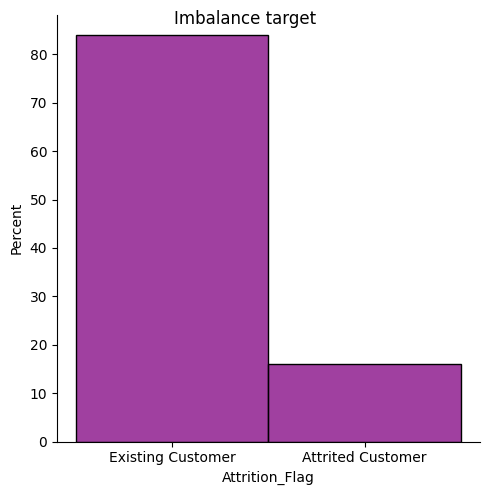

In [88]:
imbalance_graph = sns.displot(data['Attrition_Flag'],stat='percent',color='purple')
imbalance_graph.fig.suptitle('Imbalanced target')

In [51]:
lb_name_mapping = dict(zip(lb.classes_, lb.transform(lb.classes_)))
print(lb_name_mapping)

{'Attrited Customer': 0, 'Existing Customer': 1}


## Under and Over Sampling

In [95]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
ros = RandomOverSampler(random_state=0, sampling_strategy=0.5)

X_resampled, y_resampled = ros.fit_resample(features, target)


Text(0.5, 0.98, 'Random Over Sampled target')

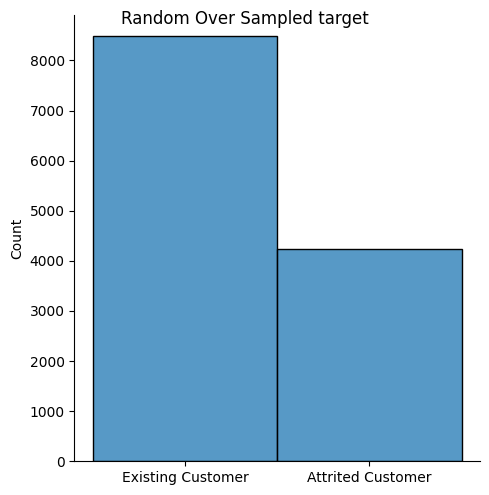

In [96]:
target_ROS = lb.inverse_transform(y_resampled)
ROS_graph = sns.displot(target_ROS)
ROS_graph.fig.suptitle('Random Over Sampled target')

In [97]:
# Split the Samples to train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=38)
y_train

array([1, 0, 1, ..., 1, 0, 0])

In [98]:
# Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Build X_train df for data visualization
X_train_df = pd.DataFrame(X_train, columns=features.columns).add_suffix('_scaled')
X_train_df.head()

,Customer_Age_scaled,Gender_scaled,Dependent_count_scaled,Marital_Status_scaled,Months_on_book_scaled,Total_Relationship_Count_scaled,Months_Inactive_12_mon_scaled,Contacts_Count_12_mon_scaled,Credit_Limit_scaled,Total_Revolving_Bal_scaled,...,Income_Category_$120K +_scaled,Income_Category_$40K - $60K_scaled,Income_Category_$60K - $80K_scaled,Income_Category_$80K - $120K_scaled,Income_Category_Less than $40K_scaled,Income_Category_Unknown_scaled,Card_Category_Blue_scaled,Card_Category_Gold_scaled,Card_Category_Platinum_scaled,Card_Category_Silver_scaled
8699,0.458818,-1.086091,0.491863,-0.966978,-0.123803,-1.711856,-0.412032,-1.372599,1.161708,1.541935,...,-0.277987,-0.462374,-0.388847,2.383835,-0.748013,-0.355804,0.268497,-0.108157,-0.039675,-0.239173
10404,-0.802065,-1.086091,0.491863,-0.966978,-0.888070,-1.076684,-0.412032,1.284121,1.113549,-1.235421,...,-0.277987,-0.462374,-0.388847,2.383835,-0.748013,-0.355804,0.268497,-0.108157,-0.039675,-0.239173
7776,0.963171,-1.086091,0.491863,0.194073,1.659487,-1.076684,0.582652,0.398548,0.292639,1.650053,...,-0.277987,-0.462374,-0.388847,2.383835,-0.748013,-0.355804,0.268497,-0.108157,-0.039675,-0.239173
12699,0.963171,0.920733,-1.069896,-0.966978,-0.251181,0.828833,-0.412032,-0.487025,-0.608279,1.266408,...,-0.277987,-0.462374,-0.388847,-0.419492,1.336875,-0.355804,0.268497,-0.108157,-0.039675,-0.239173
5416,-0.045535,0.920733,-0.289017,1.355125,-0.123803,1.464005,-0.412032,-1.372599,-0.254965,0.332872,...,-0.277987,2.162753,-0.388847,-0.419492,-0.748013,-0.355804,0.268497,-0.108157,-0.039675,-0.239173


In [99]:
# Use a KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k_range = list(range(1,10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
# Train the model with the train data
grid_search = grid.fit(X_train, y_train)

# print(grid_search.best_params_)
# print(grid_search.best_score_ *100)
print(f"Best result for {grid_search.best_params_.get('n_neighbors')} neighbors\nwith an accuracy of {round(grid_search.best_score_*100, 2)} %")
# # Make a predition on the X_test datas
# pred = knn.predict(X_test)
# # Compare the prediction with the y_test
# accuracy = knn.score(X_test, y_test)
# print(f'Test accuracy:{accuracy}')


Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best result for 1 neighbors
with an accuracy of 90.6 %


In [100]:
# Run the model with the best parameters
optimal_kn = grid_search.best_params_.get('n_neighbors')

knn_optimal = KNeighborsClassifier(n_neighbors=optimal_kn)
knn_optimal.fit(X_train, y_train)
accuracy_test = round(knn_optimal.score(X_test, y_test),3)   # model predict on X_test, and compare pred to y_test
print(f'Test sample accuracy: {accuracy_test}')

Test sample accuracy: 0.921


In [101]:
# Evaluate your model
from sklearn.metrics import classification_report
# "Attrition_Flag": {"Existing Customer":1 , "Attrited Customer": 0}}
pred = knn_optimal.predict(X_test)

print(classification_report(y_test, pred, target_names=target_names))

                   precision    recall  f1-score   support

Attrited Customer       0.86      0.92      0.89      1308
Existing Customer       0.96      0.92      0.94      2510

         accuracy                           0.92      3818
        macro avg       0.91      0.92      0.91      3818
     weighted avg       0.92      0.92      0.92      3818



In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the sparse matrix to a pandas DataFrame
graph_df = knn_optimal.kneighbors_graph().toarray()

# Plot the graph using heatmap function of seaborn
sns.heatmap(graph_df, cmap="Blues")
plt.show()


ModuleNotFoundError: No module named 'seaborn'